# data_acquisition.ipynb  

:auth: Nathan T. Stevens  
:email: ntsteven at uw.edu  
:org: Pacific Northwest Seismic Network  

**:PURPOSE:**  
This notebook documents acquisition of the `miniPNW` ML-read database curated by Ni et al. (2023) to include necessary data types for the following seismologic analysis tasks:

1. Earthquake detection and body-wave picking  
2. Phase polarity assessment  
3. Event magnitude estimation  

The notebook subsets data for earthquake type events for use in semester projects for the Fall 2023 offering of ESS 469/569. 

**:ATTRIBUTION:**  
This notebook uses segments of code from the *GeoSMART* text book, Chapter 2.9, to download and inspect the `miniPNW` dataset, and Chapter 2.3 to do some visualization of catalog events using `plotly`.

Ni, Y., Hutko, A., Skene, F., Denolle, M., Malone, S., Bodin, P., Hartog, R., & Wright, A. (2023). Curated Pacific Northwest AI-ready Seismic Dataset. Seismica, 2(1). doi: https://doi.org/10.26443/seismica.v2i1.368



# Import dependencies

In [1]:
# Install `wget` for pulling data from remote repositories
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ef7a5d217c644b11e1cd52dc7866dea15a9dc2880c2781d7f0e40c1dc6fe7c6e
  Stored in directory: /Users/nates/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [135]:
# Import python packages
import os
import wget
import pandas as pd
import h5py
import plotly.express as px
import matplotlib.pyplot as plt



# Download miniPNW database from DropBox to local disk  
Note: the `.gitignore` should prevent the following data formats from being included in the GitHub repository:  
*.csv
*.mseed
*.hdf5

Creation of the miniPNW database is documented on Yiyu Ni's GitHub repository for Ni et al. (2023)
https://github.com/niyiyu/PNW-ML/blob/main/notebooks/dev_create_miniPNW.ipynb

In [21]:
# Download data and metadata
wget.download("https://www.dropbox.com/s/f0e1ywupdbuv3l3/miniPNW_metadata.csv?dl=1")
wget.download("https://www.dropbox.com/s/0ffh4r23mitn2dz/miniPNW_waveforms.hdf5?dl=1")

# Shift data into a `data` subdirectory
# try to create `data` subdir. if it doesn't exist already
try:
    os.makedirs(os.path.join('data','meta'))
    os.makedirs(os.path.join('data','waveforms'))
except FileExistsError:
    pass

# Provide handles for file paths
fp_meta = os.path.join('data','meta','miniPNW_metadata.csv')
fp_wave = os.path.join('data','waveforms','miniPNW_waveforms.hdf5')
# move files
os.replace("miniPNW_metadata.csv", fp_meta)
os.replace("miniPNW_waveforms.hdf5", fp_wave)



In [9]:
# Load the metadata into a pandas.DataFrame
df = pd.read_csv(fp_meta, index_col=[0], parse_dates=['source_origin_time'])


In [14]:
# Display a bit of metadata
display(df.head())
# List all column names
display(df.columns)
# Show a single row-entry as a pandas.Series
display(df.iloc[0,:])

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_S_onset,trace_P_onset,trace_snr_db,year,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude
0,uw61669232,2020-09-07 03:44:14.690000+00:00,46.560,-119.797,earthquake,23.300,1.30,ml,0.241000,0.31,...,impulsive,impulsive,-1.444|2.612|9.921,2020.0,eq,1.30,0.241273,1.17,0.187840,NaN
1,uw60888282,2014-10-08 15:39:31.330000+00:00,45.371,-121.708,earthquake,-0.947,1.67,ml,0.128000,0.79,...,impulsive,impulsive,0.368|3.526|5.981,2014.0,eq,1.67,0.128000,1.63,0.099000,NaN
2,uw61361706,2017-12-30 04:37:46.870000+00:00,46.165,-120.543,earthquake,13.520,2.46,ml,0.158000,1.58,...,impulsive,emergent,11.274|13.32|15.828,2017.0,eq,2.46,0.158000,3.37,0.389000,NaN
3,uw61639436,2020-06-09 23:37:10.420000+00:00,46.542,-119.589,earthquake,16.370,1.59,ml,0.157000,0.32,...,impulsive,emergent,27.007|20.797|19.252,2020.0,eq,1.59,0.156750,1.69,0.354773,NaN
4,uw61735446,2021-05-24 10:42:37.810000+00:00,46.857,-121.941,earthquake,12.380,0.83,ml,0.082983,0.42,...,impulsive,emergent,18.579|18.912|7.609,2021.0,eq,0.83,0.082983,0.50,0.381880,NaN


Index(['event_id', 'source_origin_time', 'source_latitude_deg',
       'source_longitude_deg', 'source_type', 'source_depth_km',
       'preferred_source_magnitude', 'preferred_source_magnitude_type',
       'preferred_source_magnitude_uncertainty', 'source_depth_uncertainty_km',
       'source_horizontal_uncertainty_km', 'station_network_code',
       'station_channel_code', 'station_code', 'station_location_code',
       'station_latitude_deg', 'station_longitude_deg', 'station_elevation_m',
       'trace_name', 'trace_sampling_rate_hz', 'trace_start_time',
       'trace_S_arrival_sample', 'trace_P_arrival_sample',
       'trace_S_arrival_uncertainty_s', 'trace_P_arrival_uncertainty_s',
       'trace_P_polarity', 'trace_S_onset', 'trace_P_onset', 'trace_snr_db',
       'year', 'source_type_pnsn_label', 'source_local_magnitude',
       'source_local_magnitude_uncertainty', 'source_duration_magnitude',
       'source_duration_magnitude_uncertainty', 'source_hand_magnitude'],
      dtyp

event_id                                                        uw61669232
source_origin_time                        2020-09-07 03:44:14.690000+00:00
source_latitude_deg                                                  46.56
source_longitude_deg                                              -119.797
source_type                                                     earthquake
source_depth_km                                                       23.3
preferred_source_magnitude                                             1.3
preferred_source_magnitude_type                                         ml
preferred_source_magnitude_uncertainty                               0.241
source_depth_uncertainty_km                                           0.31
source_horizontal_uncertainty_km                                      0.24
station_network_code                                                    UW
station_channel_code                                                    HH
station_code             

#### Conduct data subsetting by `'df.source_type' == 'earthquake'`  
Conduct the following tasks  
1. Visualize the entire catalog by event type
2. Subset the catalog to `earthquake`

In [23]:
# First off, display counts of unique `source_type`
display(df.source_type.value_counts())
# Then filter by source_type
df_eq = df[df.source_type == 'earthquake']
display(df_eq.source_type.value_counts())


source_type
earthquake       500
explosion        500
surface_event    500
sonic_boom       126
thunder           94
Name: count, dtype: int64

source_type
earthquake    500
Name: count, dtype: int64

In [36]:

# First, we don't want to make duplicate stations and events, so lets do some subsetting
S_unique_NSC_combos = df_eq[['station_network_code',
                             'station_code',
                             'station_channel_code',
                             'station_latitude_deg',
                             'station_longitude_deg',
                             'station_elevation_m']].value_counts()
# display(S_unique_NSC_combos.index)
# display(S_unique_NSC_combos.index.names)

# Convert the multi-index into a new dataframe
df_eq_sta = pd.DataFrame(list(S_unique_NSC_combos.index.values), columns=['net','sta','chan','lat_deg','lon_deg','ele_m'])
#list(S_unique_NSC_combos.index.names))
# # Do some re-naming
# rename_dict = dict(zip(list(df_eq_sta.columns),'net','sta','chan','lat','lon','ele'))
# df_eq_sta = df_eq_sta.rename(columns=rename_dict)
display(df_eq_sta)


,net,sta,chan,lat,lon,ele
0,UW,GNW,BH,47.5641,-122.825,220.0
1,CC,STD,BH,46.2375,-122.224,1189.0
2,US,HAWA,BH,46.3925,-119.533,364.0
3,UW,LTY,BH,47.2545,-120.666,807.0
4,UW,DOSE,BH,47.7172,-122.972,53.3
...,...,...,...,...,...,...
171,TA,M04C,BH,41.7826,-121.839,1391.0
172,TA,L07A,BH,42.0187,-119.340,1816.0
173,TA,L02E,BH,42.1580,-123.603,454.0
174,TA,K07A,BH,42.6912,-119.247,1407.0


In [89]:
# Next get a subset of unique events using `event_id`
display(df_eq['event_id'].value_counts())
# Subset for unique combinations of origin information using .value_counts() as a multi-index 'unique' search
S_unique_origin_combos = df_eq[['event_id','source_type','source_origin_time',
                        'source_latitude_deg','source_longitude_deg',
                        'source_depth_km','source_depth_uncertainty_km',
                        'source_horizontal_uncertainty_km',
                        'preferred_source_magnitude',
                        'preferred_source_magnitude_type',
                        'preferred_source_magnitude_uncertainty']].value_counts()
display(S_unique_origin_combos)
df_eq_ev = pd.DataFrame(list(S_unique_origin_combos.index.values),
                        columns=['evid','type','origin_time','lat','lon','depth_km',
                                 'depth_err_km','loc_err_km','mag','magtype','mag_err'])
                        # columns=list(S_unique_origin_combos.index.names))
display(df_eq_ev)



event_id
uw61734671    2
uw61735446    2
uw61267857    2
uw61699817    2
uw61790042    2
             ..
uw61718752    1
uw60846122    1
uw61818396    1
uw61833821    1
uw61893561    1
Name: count, Length: 495, dtype: int64

event_id    source_type  source_origin_time                source_latitude_deg  source_longitude_deg  source_depth_km  source_depth_uncertainty_km  source_horizontal_uncertainty_km  preferred_source_magnitude  preferred_source_magnitude_type  preferred_source_magnitude_uncertainty
uw61790042  earthquake   2021-11-19 01:15:27.670000+00:00  47.339000            -121.998000           19.450           0.50                         0.37                              1.47                        ml                               0.135000                                  2
uw61699817  earthquake   2021-01-19 09:27:02.500000+00:00  45.333000            -121.691000           5.180            0.38                         0.42                              0.89                        ml                               0.092000                                  2
uw61735446  earthquake   2021-05-24 10:42:37.810000+00:00  46.857000            -121.941000           12.380           0.42                     

,evid,type,origin_time,lat,lon,depth_km,depth_err_km,loc_err_km,mag,magtype,mag_err
0,uw61790042,earthquake,2021-11-19 01:15:27.670000+00:00,47.339000,-121.998000,19.450,0.50,0.37,1.47,ml,0.135000
1,uw61699817,earthquake,2021-01-19 09:27:02.500000+00:00,45.333000,-121.691000,5.180,0.38,0.42,0.89,ml,0.092000
2,uw61735446,earthquake,2021-05-24 10:42:37.810000+00:00,46.857000,-121.941000,12.380,0.42,0.48,0.83,ml,0.082983
3,uw61734671,earthquake,2021-05-22 23:32:45.010000+00:00,47.598000,-121.487000,93.410,0.76,0.59,1.32,ml,0.156000
4,uw61267857,earthquake,2017-05-20 01:21:51.300000+00:00,47.590000,-122.595000,25.810,0.73,0.59,1.64,ml,0.146000
...,...,...,...,...,...,...,...,...,...,...,...
484,uw60757162,earthquake,2014-05-06 12:01:39.650000+00:00,47.806000,-122.817000,18.997,1.07,1.18,0.72,ml,0.155000
485,uw60755872,earthquake,2014-05-05 16:36:24.230000+00:00,47.691000,-120.166000,5.989,1.55,0.54,0.99,ml,0.036000
486,uw60755457,earthquake,2014-05-05 09:23:54.180000+00:00,48.592000,-123.050000,12.989,1.10,0.43,0.47,ml,0.239000
487,uw60739476,earthquake,2014-04-10 04:31:10.160000+00:00,47.438000,-122.708000,17.611,0.78,0.65,0.74,ml,0.041000


We can notice here that there are more unique event_id's than unique combinations of event_id's with origin information.  
Let's take a look at which event_ids don't make the multi-index'd list...

In [48]:
# This compound line says "give me event_id's in df_eq not present in df_eq_ev"
df_eq[~df_eq.event_id.isin(df_eq_ev.event_id)]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_S_onset,trace_P_onset,trace_snr_db,year,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude
77,uw61734881,2021-05-23 21:03:19.780000+00:00,46.813,-121.966,earthquake,7.450,0.220,mh,NaN,0.56,...,emergent,emergent,2.168|3.668|-1.347,2021.0,eq,NaN,NaN,-0.17,0.178298,0.220
149,uw61568547,2020-01-24 21:35:33.680000+00:00,48.542,-125.215,earthquake,9.890,4.500,mh,NaN,31.61,...,impulsive,impulsive,57.356|58.647|61.341,2020.0,eq,4.62,0.258903,4.69,0.150465,4.500
253,uw60997766,2015-04-11 05:14:11.950000+00:00,44.175,-116.261,earthquake,8.236,1.800,md,NaN,10.68,...,impulsive,impulsive,4.775|10.215|8.57,2015.0,eq,NaN,NaN,1.80,0.000000,NaN
385,uw61663957,2020-08-26 14:06:00.140000+00:00,46.196,-122.199,earthquake,-0.340,0.025,mh,NaN,0.93,...,emergent,impulsive,26.982|25.716|13.225,2020.0,eq,NaN,NaN,2.37,0.110495,0.025
421,uw60514452,2013-04-03 22:07:31.670000+00:00,42.034,-124.200,earthquake,-1.002,0.700,md,NaN,2.50,...,emergent,emergent,2.315|-2.214|-4.71,2013.0,eq,1.63,0.145000,0.70,0.000000,1.300
498,uw61513872,2019-03-12 02:40:24.820000+00:00,46.198,-122.177,earthquake,2.070,0.240,mh,NaN,0.37,...,impulsive,emergent,2.373|8.584|9.173,2019.0,eq,NaN,NaN,0.58,0.004481,0.240


It appears that the reason for these evid's being dropped may have to do with not having magnitude data!

Let's make an interactive map.

In [114]:
# Render earthquakes first so they underlie
fig = px.scatter_mapbox(df_eq_ev.sort_values('mag', ascending=True),
                        lat='lat',lon='lon',size='mag',
                        color='mag',hover_name='evid',
                        hover_data=['origin_time','lon','lat','depth_km','magtype','mag'],
                        height=600, width=600, zoom = 5)


fig2 = px.scatter_mapbox(df_eq_sta,lat='lat',lon='lon',
                        color='chan',
                        height=600,width=600,zoom=5,
                        hover_name='sta',
                        hover_data=['net','chan','lon','lat','ele'])

fig.add_trace(fig2.data[0])
fig.update_layout(mapbox_style='carto-positron')
fig.update_geos(resolution=110)

While this interactive map is pretty, it's kind of a pain for making report-ready figures.
I'm a bit of a control-freak when it comes to plotting options, so I tend to do most things in 
matplotlib for visualizing data.

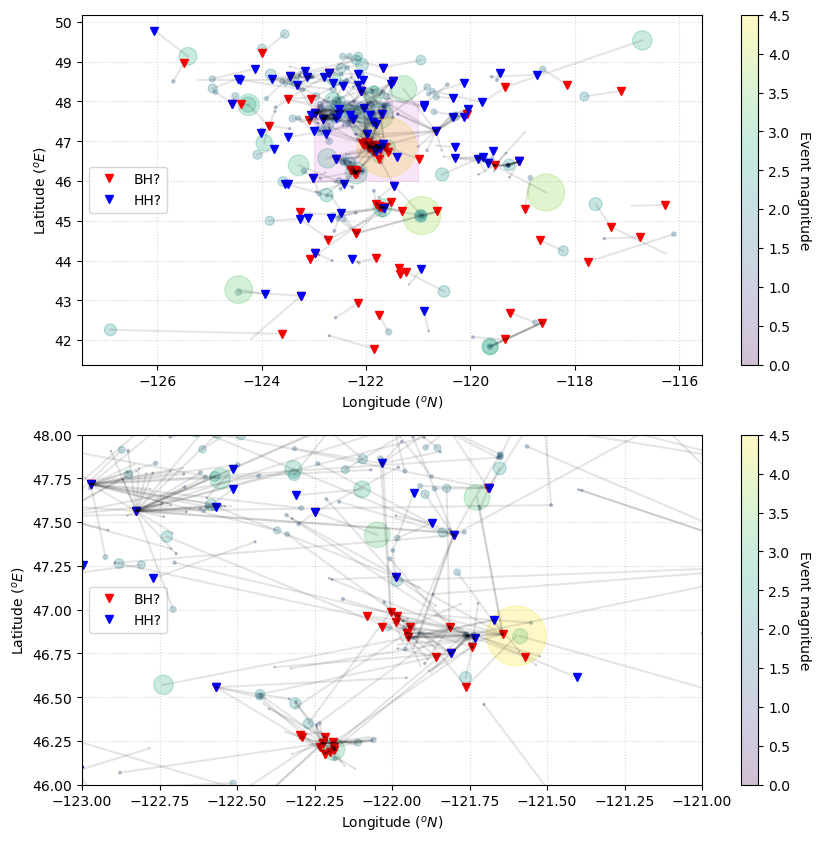

In [152]:
# Let's visualize stations, events, and travel paths.
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
zoom_zone = (-123, -121, 46, 48)

for _I, ax in enumerate([ax1,ax2]):
    # Plot stations by channel type
    for _c,_v in zip(['r','b'],df_eq_sta.chan.unique()):
        # Subset station data by channel type
        _df_eq_sta = df_eq_sta[df_eq_sta.chan==_v]
        # Plot stations with specified channel type
        ax.plot(_df_eq_sta['lon'],_df_eq_sta['lat'],'v',color=_c,label=f'{_v}?', zorder=2)

    # Plot events, with scaling and color based on magnitude
    cax = ax.scatter(df_eq_ev['lon'],df_eq_ev['lat'],s=df_eq_ev['mag']**5, c=df_eq_ev['mag'], alpha=0.25, zorder=1)
    # populate colorbar
    ch = plt.colorbar(cax)
    # Add a label, plus some options to have the text descend
    ch.set_label('Event magnitude', rotation=270, labelpad=15)

    # Plot raypaths (station-event pairs)
    for _i in range(len(df_eq)):
        # Get subset pandas.Series entry within df_eq
        _S_eq = df_eq.iloc[_i,:]
        # Plot individual lines from source to receiver for each entry
        ax.plot([_S_eq['source_longitude_deg'], _S_eq['station_longitude_deg']],
                [_S_eq['source_latitude_deg'], _S_eq['station_latitude_deg']],
                'k-', alpha=0.1, zorder=10)

    # Insert axis labels, gridlines, and legend - "Window-dressing"
    ax.set_xlabel('Longitude ($^oN$)')
    ax.set_ylabel('Latitude ($^oE$)')
    ax.legend(loc='center left')
    ax.grid(linestyle=':', alpha=0.5)

    # If second plot, provide zoomed view
    if _I == 1:
        ax.set_xlim(zoom_zone[:2])
        ax.set_ylim(zoom_zone[2:])
    else:
        ax.fill_between(zoom_zone[:2],[zoom_zone[2]]*2,[zoom_zone[3]]*2,color='m',alpha=0.1)




Although the syntax above is somewhat opaque, using base-level plotting commands allows for extreme degrees of control on the form of plots and the ability to integrate multiple datasets into a single figure. This becomes a headache with libraries like `folium` and `plotly`.

For my usual workflow, if I'm making a map, I export most of these processed data into CSV files and do final publication-ready visualizations in `QGIS`.



OK, back to getting subset data